In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.linear_model as lm
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import StandardScaler, label_binarize
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve, auc, f1_score, precision_score, recall_score
from sklearn.svm import SVC
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler

In [2]:
from aif360.datasets import StandardDataset
from aif360.metrics import BinaryLabelDatasetMetric, ClassificationMetric
import matplotlib.patches as patches
from aif360.algorithms.preprocessing import Reweighing
#from packages import *
#from ml_fairness import *
import matplotlib.pyplot as plt
import seaborn as sns



from IPython.display import Markdown, display

# Bank Marketing Analysis for Term Deposit

## 1. Background

The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) was subscribed or not. Data set has 20 predictor varaibles (features) and around 41K rows. Top 6 rows of the dataset is shown below.

In [4]:
data = pd.read_csv('../../Data/bank-additional-full.csv', sep = ';')
data.head()

age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  ...  campaign  pdays  previous     poutcome emp.var.rate  \
0   may         mon  ...         1    999         0  nonexistent          1.1   
1   may         mon  ...         1    999         0  nonexistent          1.1   
2   may         mon  ...         1    999         0  nonexistent          1.1   
3   may         mon  ...         1    999         0  nonexistent          1.1   
4   may         mon  ...         1    999         0  nonexistent          1.1   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed   y  
0          93.994          -36.4      4.857       5191.0  no  
1          93.994          -36.4      4.857       5191.0  no  
2          93.994          -36.4      4.857       5191.0  no  
3          93.994          -36.4      4.857       5191.0  no  
4          93.994          -36.4      4.857       5191.0  no  

[5 rows x 21 columns]

Customers who received phone calls may not be unique and a same customer might have received multiple calls. The last column in the dataset 'y' is our response. This report tries to get the best model to predict the subscription of term deposit. This report is divided into five sections. Graphical analysis is explored in Section 2, various methodologies to treat imbalance in data is discussed in Section 3, different models are fit in Section 4 and conclusive remarks are drawn in Section 5.

## 2. Graphical Analysis

In [5]:
data1 = data[data['y'] == 'yes']
data2 = data[data['y'] == 'no']

In the given dataset, there are 10 categorical variables and 10 continous variables. All categorical variables are visualized using stacked barplots (color coded using OSU colors :) for 'yes' and 'no' outcome of term deposit subscription. Below are the 10 barplots.

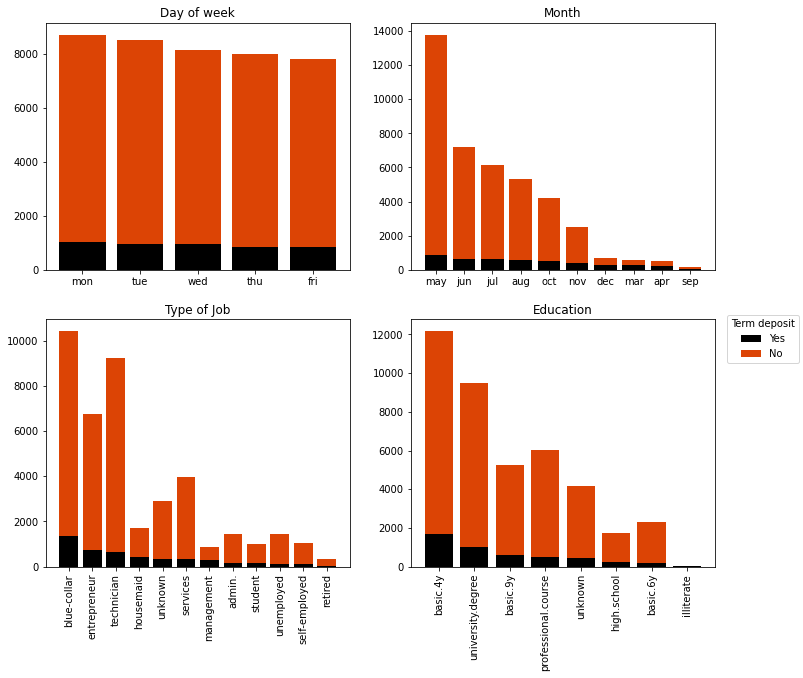

In [6]:
fig, ax = plt.subplots(2, 2, figsize=(12,10))

b1 = ax[0, 0].bar(data1['day_of_week'].unique(),height = data1['day_of_week'].value_counts(),color='#000000')
b2 = ax[0, 0].bar(data2['day_of_week'].unique(),height = data2['day_of_week'].value_counts(),bottom = data1['day_of_week'].value_counts(),color = '#DC4405') 
ax[0, 0].title.set_text('Day of week')
#ax[0, 0].legend((b1[0], b2[0]), ('Yes', 'No'))
ax[0, 1].bar(data1['month'].unique(),height = data1['month'].value_counts(),color='#000000')
ax[0, 1].bar(data2['month'].unique(),height = data2['month'].value_counts(),bottom = data1['month'].value_counts(),color = '#DC4405') 
ax[0, 1].title.set_text('Month')
ax[1, 0].bar(data1['job'].unique(),height = data1['job'].value_counts(),color='#000000')
ax[1, 0].bar(data1['job'].unique(),height = data2['job'].value_counts()[data1['job'].value_counts().index],bottom = data1['job'].value_counts(),color = '#DC4405') 
ax[1, 0].title.set_text('Type of Job')
ax[1, 0].tick_params(axis='x',rotation=90)
ax[1, 1].bar(data1['education'].unique(),height = data1['education'].value_counts(),color='#000000') #row=0, col=1
ax[1, 1].bar(data1['education'].unique(),height = data2['education'].value_counts()[data1['education'].value_counts().index],bottom = data1['education'].value_counts(),color = '#DC4405') 
ax[1, 1].title.set_text('Education')
ax[1, 1].tick_params(axis='x',rotation=90)
#ax[0, 1].xticks(rotation=90)
plt.figlegend((b1[0], b2[0]), ('Yes', 'No'),loc="right",title = "Term deposit")
plt.show()

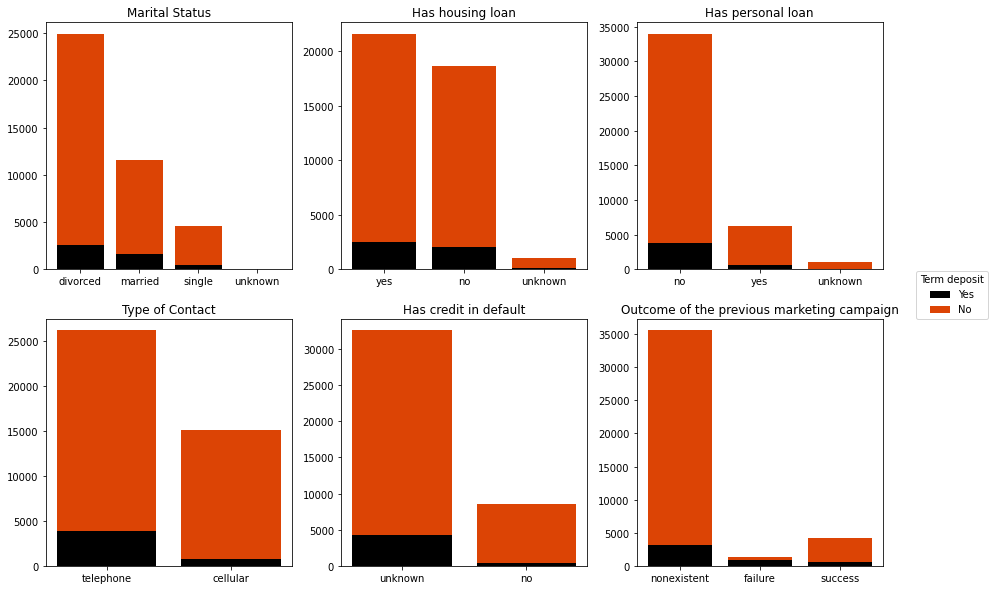

In [7]:
fig, ax = plt.subplots(2, 3, figsize=(15,10))

b1 = ax[0, 0].bar(data1['marital'].unique(),height = data1['marital'].value_counts(),color='#000000')
b2 = ax[0, 0].bar(data1['marital'].unique(),height = data2['marital'].value_counts()[data1['marital'].value_counts().index],bottom = data1['marital'].value_counts(),color = '#DC4405') 
ax[0, 0].title.set_text('Marital Status')
#ax[0, 0].legend((b1[0], b2[0]), ('Yes', 'No'))
ax[0, 1].bar(data1['housing'].unique(),height = data1['housing'].value_counts(),color='#000000')
ax[0, 1].bar(data1['housing'].unique(),height = data2['housing'].value_counts()[data1['housing'].value_counts().index],bottom = data1['housing'].value_counts(),color = '#DC4405') 
ax[0, 1].title.set_text('Has housing loan')
ax[0, 2].bar(data1['loan'].unique(),height = data1['loan'].value_counts(),color='#000000')
ax[0, 2].bar(data1['loan'].unique(),height = data2['loan'].value_counts()[data1['loan'].value_counts().index],bottom = data1['loan'].value_counts(),color = '#DC4405') 
ax[0, 2].title.set_text('Has personal loan')
ax[1, 0].bar(data1['contact'].unique(),height = data1['contact'].value_counts(),color='#000000')
ax[1, 0].bar(data1['contact'].unique(),height = data2['contact'].value_counts()[data1['contact'].value_counts().index],bottom = data1['contact'].value_counts(),color = '#DC4405') 
ax[1, 0].title.set_text('Type of Contact')
ax[1, 1].bar(data1['default'].unique(),height = data1['default'].value_counts(),color='#000000')
ax[1, 1].bar(data1['default'].unique(),height = data2['default'].value_counts()[data1['default'].value_counts().index],bottom = data1['default'].value_counts(),color = '#DC4405') 
ax[1, 1].title.set_text('Has credit in default')
ax[1, 2].bar(data1['poutcome'].unique(),height = data1['poutcome'].value_counts(),color='#000000')
ax[1, 2].bar(data1['poutcome'].unique(),height = data2['poutcome'].value_counts()[data1['poutcome'].value_counts().index],bottom = data1['poutcome'].value_counts(),color = '#DC4405') 
ax[1, 2].title.set_text('Outcome of the previous marketing campaign')
plt.figlegend((b1[0], b2[0]), ('Yes', 'No'),loc="right",title = "Term deposit")
plt.show()

All the categories in each categorical variable has disproportinate 'yes' compared to 'no' for term deposit subscription. Only noteworthy mention is that in 'Outcome of the previous marketing campaign' variable, failure category has more 'yes' compared to 'no'. This means, if the previous campaign call failed to get the customers to subscribe, repeated calls got customers to subscribe to term deposit. For 10 continous variables, unstacked histograms are plotted below.

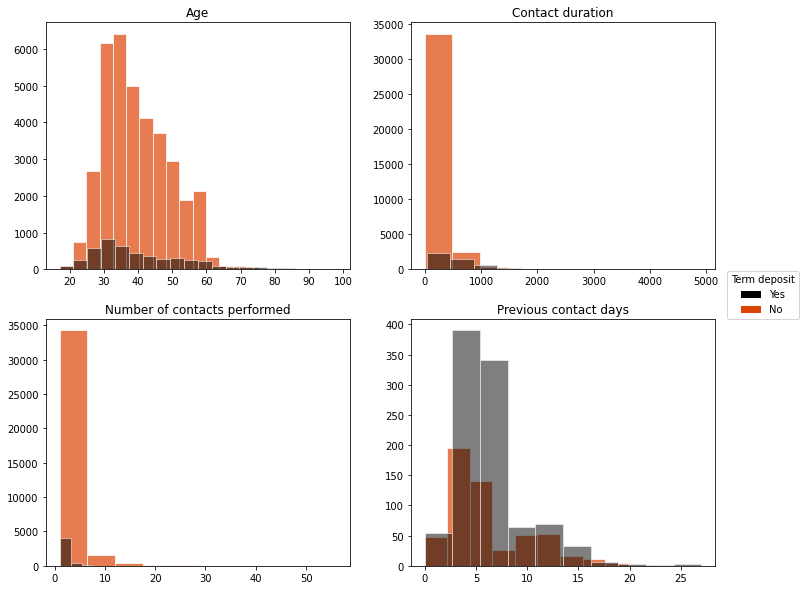

In [8]:
fig, ax = plt.subplots(2, 2, figsize=(12,10))

ax[0, 0].hist(data2['age'],color = '#DC4405',alpha=0.7,bins=20, edgecolor='white') 
ax[0, 0].hist(data1['age'],color='#000000',alpha=0.5,bins=20, edgecolor='white')
ax[0, 0].title.set_text('Age')
ax[0, 1].hist(data2['duration'],color = '#DC4405',alpha=0.7, edgecolor='white') 
ax[0, 1].hist(data1['duration'],color='#000000',alpha=0.5, edgecolor='white')
ax[0, 1].title.set_text('Contact duration')
ax[1, 0].hist(data2['campaign'],color = '#DC4405',alpha=0.7, edgecolor='white') 
ax[1, 0].hist(data1['campaign'],color='#000000',alpha=0.5, edgecolor='white')
ax[1, 0].title.set_text('Number of contacts performed')
ax[1, 1].hist(data2[data2['pdays'] != 999]['pdays'],color = '#DC4405',alpha=0.7, edgecolor='white') 
ax[1, 1].hist(data1[data1['pdays'] != 999]['pdays'],color='#000000',alpha=0.5, edgecolor='white')
ax[1, 1].title.set_text('Previous contact days')
plt.figlegend((b1[0], b2[0]), ('Yes', 'No'),loc="right",title = "Term deposit")
plt.show()

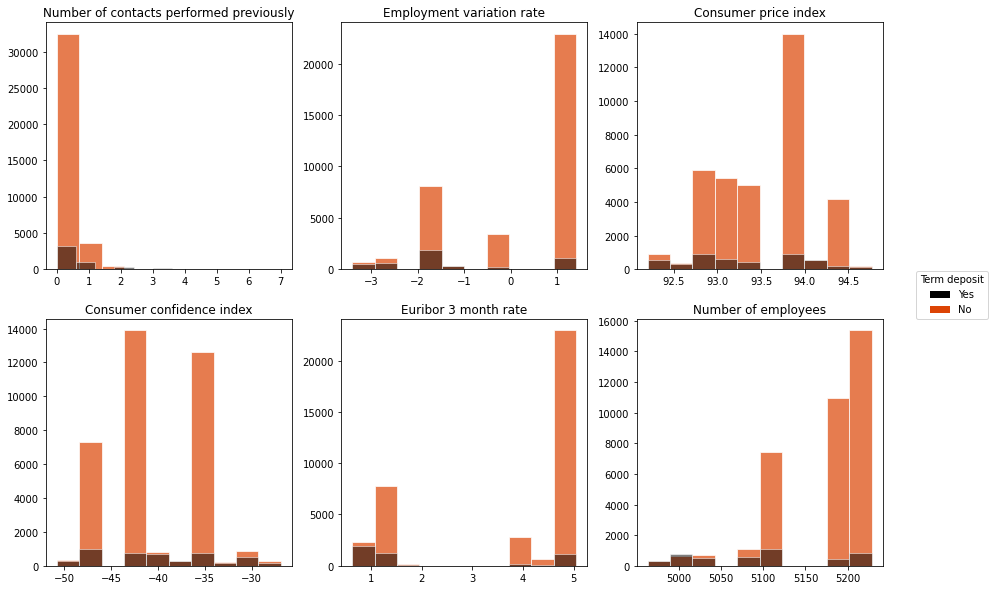

In [9]:
fig, ax = plt.subplots(2, 3, figsize=(15,10))
ax[0, 0].hist(data2['previous'],color = '#DC4405',alpha=0.7, edgecolor='white') 
ax[0, 0].hist(data1['previous'],color='#000000',alpha=0.5, edgecolor='white')
ax[0, 0].title.set_text('Number of contacts performed previously')
ax[0, 1].hist(data2['emp.var.rate'],color = '#DC4405',alpha=0.7, edgecolor='white') 
ax[0, 1].hist(data1['emp.var.rate'],color='#000000',alpha=0.5, edgecolor='white')
ax[0, 1].title.set_text('Employment variation rate')
ax[0, 2].hist(data2['cons.price.idx'],color = '#DC4405',alpha=0.7, edgecolor='white') 
ax[0, 2].hist(data1['cons.price.idx'],color='#000000',alpha=0.5, edgecolor='white')
ax[0, 2].title.set_text('Consumer price index')
ax[1, 0].hist(data2['cons.conf.idx'],color = '#DC4405',alpha=0.7, edgecolor='white') 
ax[1, 0].hist(data1['cons.conf.idx'],color='#000000',alpha=0.5, edgecolor='white')
ax[1, 0].title.set_text('Consumer confidence index')
ax[1, 1].hist(data2['euribor3m'],color = '#DC4405',alpha=0.7, edgecolor='white') 
ax[1, 1].hist(data1['euribor3m'],color='#000000',alpha=0.5, edgecolor='white')
ax[1, 1].title.set_text('Euribor 3 month rate')
ax[1, 2].hist(data2['nr.employed'],color = '#DC4405',alpha=0.7, edgecolor='white') 
ax[1, 2].hist(data1['nr.employed'],color='#000000',alpha=0.5, edgecolor='white')
ax[1, 2].title.set_text('Number of employees')
plt.figlegend((b1[0], b2[0]), ('Yes', 'No'),loc="right",title = "Term deposit")
plt.show()

All the histograms show similar behavior (proportion of 'no' is higher than 'yes') except 'Previous contact days'. Proportion of 'yes' is higher compared to 'no' (only if contacted more than once).

In [10]:
predictors = data.iloc[:,0:20]
predictors = predictors.drop(['pdays'],axis=1)
y = data.iloc[:,20]
X = pd.get_dummies(predictors)

In [11]:
X

age  duration  campaign  previous  emp.var.rate  cons.price.idx  \
0       56       261         1         0           1.1          93.994   
1       57       149         1         0           1.1          93.994   
2       37       226         1         0           1.1          93.994   
3       40       151         1         0           1.1          93.994   
4       56       307         1         0           1.1          93.994   
...    ...       ...       ...       ...           ...             ...   
41183   73       334         1         0          -1.1          94.767   
41184   46       383         1         0          -1.1          94.767   
41185   56       189         2         0          -1.1          94.767   
41186   44       442         1         0          -1.1          94.767   
41187   74       239         3         1          -1.1          94.767   

       cons.conf.idx  euribor3m  nr.employed  job_admin.  ...  month_oct  \
0              -36.4      4.857       5191.0           0  ...          0   
1              -36.4      4.857       5191.0           0  ...          0   
2              -36.4      4.857       5191.0           0  ...          0   
3              -36.4      4.857       5191.0           1  ...          0   
4              -36.4      4.857       5191.0           0  ...          0   
...              ...        ...          ...         ...  ...        ...   
41183          -50.8      1.028       4963.6           0  ...          0   
41184          -50.8      1.028       4963.6           0  ...          0   
41185          -50.8      1.028       4963.6           0  ...          0   
41186          -50.8      1.028       4963.6           0  ...          0   
41187          -50.8      1.028       4963.6           0  ...          0   

       month_sep  day_of_week_fri  day_of_week_mon  day_of_week_thu  \
0              0                0                1                0   
1              0                0                1                0   
2              0                0                1                0   
3              0                0                1                0   
4              0                0                1                0   
...          ...              ...              ...              ...   
41183          0                1                0                0   
41184          0                1                0                0   
41185          0                1                0                0   
41186          0                1                0                0   
41187          0                1                0                0   

       day_of_week_tue  day_of_week_wed  poutcome_failure  \
0                    0                0                 0   
1                    0                0                 0   
2                    0                0                 0   
3                    0                0                 0   
4                    0                0                 0   
...                ...              ...               ...   
41183                0                0                 0   
41184                0                0                 0   
41185                0                0                 0   
41186                0                0                 0   
41187                0                0                 1   

       poutcome_nonexistent  poutcome_success  
0                         1                 0  
1                         1                 0  
2                         1                 0  
3                         1                 0  
4                         1                 0  
...                     ...               ...  
41183                     1                 0  
41184                     1                 0  
41185                     1                 0  
41186                     1                 0  
41187                     0                 0  

[41188 rows x 62 columns]

## 3. Treating Imbalanced Data

Given data set is highly imbalanced, i.e. number of data belonging to 'no' category is way higher than 'yes' category.

In [12]:
y.value_counts()

no     36548
yes     4640
Name: y, dtype: int64

This imbalance has to treated so as to make sure that there is no bias in modeling. Imbalance is generally treated in three ways.

### 3.1 Random Undersampling

In this method, the majority category, in this case 'no' category is randomly sampled to match the size of the minority 'yes' category. Remaining data of majority category is discarded.

In [13]:
rus = RandomUnderSampler(random_state=0)
X_Usampled, y_Usampled = rus.fit_resample(X, y)
pd.Series(y_Usampled).value_counts()

no     4640
yes    4640
Name: y, dtype: int64

### 3.2 Random Oversampling

In this method, the minority category 'no' is randomly sampled with replacement to match the size of the majority 'no' category. Minority category entries will be repeated many times.

In [14]:
ros = RandomOverSampler(random_state=0)
X_Osampled, y_Osampled = ros.fit_resample(X, y)
pd.Series(y_Osampled).value_counts()

yes    36548
no     36548
Name: y, dtype: int64

### 3.3 SMOTE - Synthetic Minority Oversampling Technique

This is an oversampling technique in which instead of randomly repeating minority 'yes' category, new entires are sythetically created maintaining the convexity of minority entry space. Minority category will again match the majority category samples.

In [15]:
sm = SMOTE(random_state=0)
X_SMOTE, y_SMOTE = sm.fit_resample(X, y)
pd.Series(y_SMOTE).value_counts()

yes    36548
no     36548
Name: y, dtype: int64

These different imbalance treatements will be used in different data modeling techniques based on the need.

## 4. Model Fitting

### 4.1 Perceptron

Simple linear classifier is fitted on the imbalanced data. Model is highly biased towards 'no' class. Accuracy is high for this model which is expected for imbalanced data. 

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)
perp_model = lm.Perceptron().fit(X_train_std,y_train)
y_pred = perp_model.predict(X_test_std)
print("Accuracy: ",round(accuracy_score(y_test, y_pred),2))

Confusion matrix gives a better idea. Categorization of minority 'yes' class is far from perfect which is indicated by poor precision score and recall score.

In [ ]:
mat = confusion_matrix(y_test,y_pred,labels=['no','yes'])
print(mat)
y_test = label_binarize(y_test,classes=['no','yes'])
y_pred = label_binarize(y_pred,classes=['no','yes'])
print("Precision: ",round(precision_score(y_test,y_pred),2),"Recall: ",round(recall_score(y_test,y_pred),2))

When percptron model is fit for SMOTE data, bias is shifted towards 'yes' class. This results in better recall score and worse precision score than before.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
sm = SMOTE(random_state=0)
X_SMOTE, y_SMOTE = sm.fit_resample(X_train, y_train)
sc = StandardScaler()
sc.fit(X_SMOTE)
X_train_std = sc.transform(X_SMOTE)
X_test_std = sc.transform(X_test)
perp_model = lm.Perceptron().fit(X_train_std,y_SMOTE)
y_pred = perp_model.predict(X_test_std)
print("Accuracy: ",round(accuracy_score(y_test, y_pred),2))
mat = confusion_matrix(y_test,y_pred)
print("Confusion Matrix: \n",mat)
y_test = label_binarize(y_test,classes=['no','yes'])
y_pred = label_binarize(y_pred,classes=['no','yes'])
print("Precision: ",round(precision_score(y_test,y_pred),2),"Recall: ",round(recall_score(y_test,y_pred),2))

### 4.2 Decision Tree

Decision tree is another simple yet powerful classification tool. But this model faces the same problem of bad precision score and bad recall score for imbalanced data.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
tree = DecisionTreeClassifier(criterion="entropy", max_depth=7)
model = tree.fit(X_train,y_train)
y_pred = model.predict(X_test)
y_test = label_binarize(y_test,classes=['no','yes'])
y_pred = label_binarize(y_pred,classes=['no','yes'])
print("Precision: ",round(precision_score(y_test,y_pred),2),"Recall: ",round(recall_score(y_test,y_pred),2))

When decision tree is fit on SMOTE data, recall score improves but precision score deteriorates.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
tree = DecisionTreeClassifier(criterion="entropy", max_depth=7)
X_SMOTE, y_SMOTE = sm.fit_resample(X_train, y_train)
model = tree.fit(X_SMOTE,y_SMOTE)
y_pred = model.predict(X_test)
y_test = label_binarize(y_test,classes=['no','yes'])
y_pred = label_binarize(y_pred,classes=['no','yes'])
print("Precision: ",round(precision_score(y_test,y_pred),2),"Recall: ",round(recall_score(y_test,y_pred),2))

### 4.3 Random Forest

Random forest is an ensemble technique which reduces the variance in the classification technique. But this classification worsens the bias that is already in the data. Random forest performs badly in terms of precision and recall when applied on imbalanced data.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
forest = RandomForestClassifier(n_estimators= 1000,criterion="gini", max_depth=5,min_samples_split = 0.4,min_samples_leaf=1, class_weight="balanced")
model = forest.fit(X_train,y_train)
y_pred = model.predict(X_test)
pd.Series(y_pred).value_counts()
y_test = label_binarize(y_test,classes=['no','yes'])
y_pred = label_binarize(y_pred,classes=['no','yes'])
print("Precision: ",round(precision_score(y_test,y_pred),2),"Recall: ",round(recall_score(y_test,y_pred),2))

Random forest classification hardly performs better when applied on SMOTE data in terms of precision and recall.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
forest = RandomForestClassifier(n_estimators= 1000,criterion="gini", max_depth=5,min_samples_split = 0.4,min_samples_leaf=1, class_weight="balanced")
X_SMOTE, y_SMOTE = sm.fit_resample(X_train, y_train)
model = forest.fit(X_SMOTE,y_SMOTE)
y_pred = model.predict(X_test)
pd.Series(y_pred).value_counts()
y_test = label_binarize(y_test,classes=['no','yes'])
y_pred = label_binarize(y_pred,classes=['no','yes'])
print("Precision: ",round(precision_score(y_test,y_pred),2),"Recall: ",round(recall_score(y_test,y_pred),2))

### 4.4 Logistic Regression

Logisitic regression was fit on imbalanced, random undersampled, random oversampled and SMOTE data. Last three models (logistic regression on treated data) performs fairly better than previous models especially in terms of recall, but still there is room for improvement on precision.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
model = lm.LogisticRegression(random_state=0, solver='lbfgs',multi_class='auto',max_iter=1000).fit(X_train,y_train)
y_pred = model.predict_proba(X_test)
y_pred = y_pred[:,1]
y_test = label_binarize(y_test,classes=['no','yes'])
fpr_imb, tpr_imb, _ = roc_curve(y_test, y_pred)
roc_auc_imb = auc(fpr_imb, tpr_imb)
y_pred = model.predict(X_test)
y_pred = label_binarize(y_pred,classes=['no','yes'])
print("Imbalanced -")
print("Precision: ",round(precision_score(y_test,y_pred),2),"Recall: ",round(recall_score(y_test,y_pred),2))
# Undersampled
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
rus = RandomUnderSampler(random_state=0)
X_Usampled, y_Usampled = rus.fit_resample(X_train, y_train)
model = lm.LogisticRegression(random_state=0, solver='lbfgs',multi_class='auto',max_iter=5000).fit(X_Usampled,y_Usampled)
y_pred = model.predict_proba(X_test)
y_pred = y_pred[:,1]
y_test = label_binarize(y_test,classes=['no','yes'])
fpr_us, tpr_us, _ = roc_curve(y_test, y_pred)
roc_auc_us = auc(fpr_us, tpr_us)
y_pred = model.predict(X_test)
y_pred = label_binarize(y_pred,classes=['no','yes'])
print("Random undersampled -")
print("Precision: ",round(precision_score(y_test,y_pred),2),"Recall: ",round(recall_score(y_test,y_pred),2))
# Oversampled
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
ros = RandomOverSampler(random_state=0)
X_Osampled, y_Osampled = ros.fit_resample(X_train, y_train)
model = lm.LogisticRegression(random_state=0, solver='lbfgs',multi_class='auto',max_iter=5000).fit(X_Osampled, y_Osampled)
y_pred = model.predict_proba(X_test)
y_pred = y_pred[:,1]
y_test = label_binarize(y_test,classes=['no','yes'])
fpr_os, tpr_os, _ = roc_curve(y_test, y_pred)
roc_auc_os = auc(fpr_os, tpr_os)
y_pred = model.predict(X_test)
y_pred = label_binarize(y_pred,classes=['no','yes'])
print("Random oversampled -")
print("Precision: ",round(precision_score(y_test,y_pred),2),"Recall: ",round(recall_score(y_test,y_pred),2))
# SMOTE
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
sm = SMOTE(random_state=0)
X_SMOTE, y_SMOTE = sm.fit_resample(X_train, y_train)
model = lm.LogisticRegression(random_state=0, solver='lbfgs',multi_class='auto',max_iter=5000).fit(X_SMOTE,y_SMOTE)
y_pred = model.predict_proba(X_test)
y_pred = y_pred[:,1]
y_test = label_binarize(y_test,classes=['no','yes'])
fpr_smote, tpr_smote, _ = roc_curve(y_test, y_pred)
roc_auc_smote = auc(fpr_smote, tpr_smote)
y_pred = model.predict(X_test)
y_pred = label_binarize(y_pred,classes=['no','yes'])
print("SMOTE -")
print("Precision: ",round(precision_score(y_test,y_pred),2),"Recall: ",round(recall_score(y_test,y_pred),2))

ROC curve depicts the variation of True Positive Rate to False Positive Rate. Area under ROC curve is slightly better for over sampled data compared to imbalanced and undersampled data.

In [ ]:
plt.figure()
lw = 2
plt.plot(fpr_imb, tpr_imb,
         label='Imbalanced data ROC curve (area = {0:0.4f})'
               ''.format(roc_auc_imb),
         color='deeppink', linestyle=':', linewidth=2)

plt.plot(fpr_us, tpr_us,
         label='Undersampled data ROC curve (area = {0:0.4f})'
               ''.format(roc_auc_us),
         color='blue', linestyle='--', linewidth=2)

plt.plot(fpr_os, tpr_os,
         label='Random Oversampled data ROC curve (area = {0:0.4f})'
               ''.format(roc_auc_os),
         color='darkred', linestyle='--', linewidth=2)

plt.plot(fpr_smote, tpr_smote,
         label='SMOTE data ROC curve (area = {0:0.4f})'
               ''.format(roc_auc_smote),
         color='darkgreen', linestyle='--', linewidth=2)

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.00])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

### 4.5 SVM

Support Vector Machine is employed for SMOTE data using two kernels: linear and guassian. Gaussian kernel performs the best in terms of both precision and recall.

In [ ]:
sm = SMOTE(random_state=0)
X_SMOTE, y_SMOTE = sm.fit_resample(X, y)
X_train, X_test, y_train, y_test = train_test_split(X_SMOTE, y_SMOTE, test_size=0.3)
svm = SVC(kernel='linear')
model = svm.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_test = label_binarize(y_test,classes=['no','yes'])
y_pred = label_binarize(y_pred,classes=['no','yes'])
print("Linear kernel- ","Precision: ",round(precision_score(y_test,y_pred),2),"Recall: ",round(recall_score(y_test,y_pred),2))
fpr_linear, tpr_linear, _ = roc_curve(y_test, y_pred)
roc_auc_linear = auc(fpr_linear, tpr_linear)
sm = SMOTE(random_state=0)
X_SMOTE, y_SMOTE = sm.fit_resample(X, y)
X_train, X_test, y_train, y_test = train_test_split(X_SMOTE, y_SMOTE, test_size=0.3)
svm = SVC(kernel='rbf')
model = svm.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_test = label_binarize(y_test,classes=['no','yes'])
y_pred = label_binarize(y_pred,classes=['no','yes'])
print("Guassian kernel- ","Precision: ",round(precision_score(y_test,y_pred),2),"Recall: ",round(recall_score(y_test,y_pred),2))
fpr_rbf, tpr_rbf, _ = roc_curve(y_test, y_pred)
roc_auc_rbf = auc(fpr_rbf, tpr_rbf)

ROC curves for two different kernels.

In [ ]:
plt.figure()
lw = 2

plt.plot(fpr_linear, tpr_linear,
         label='Linear Kernel ROC curve (area = {0:0.4f})'
               ''.format(roc_auc_linear),
         color='darkred', linestyle='--', linewidth=2)

plt.plot(fpr_rbf, tpr_rbf,
         label='Gaussian Kernel ROC curve (area = {0:0.4f})'
               ''.format(roc_auc_rbf),
         color='darkgreen', linestyle='--', linewidth=2)

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.00])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

## 5. Conclusion

For the given data, visualization of data, ways to treat imbalance in the data and best predictive model to determine the term deposit subscription was explored. From visualization, it can be derived that repeated campaign calls to customers within 20 days of previous call increases the subscription. After treating the imbalance in data using SMOTE, SVM with Gaussian kernel performs the best in terms of precision and recall.

## Fairness

In [16]:
# This DataFrame is created to stock differents models and fair metrics that we produce in this notebook
algo_metrics = pd.DataFrame(columns=['model', 'fair_metrics', 'prediction', 'probs'])

def add_to_df_algo_metrics(algo_metrics, model, fair_metrics, preds, probs, name):
    return algo_metrics.append(pd.DataFrame(data=[[model, fair_metrics, preds, probs]], columns=['model', 'fair_metrics', 'prediction', 'probs'], index=[name]))

In [17]:
def fair_metrics(dataset, pred, pred_is_dataset=False):
    if pred_is_dataset:
        dataset_pred = pred
    else:
        dataset_pred = dataset.copy()
        dataset_pred.labels = pred
    
    cols = ['statistical_parity_difference', 'equal_opportunity_difference', 'average_abs_odds_difference',  'disparate_impact', 'theil_index']
    obj_fairness = [[0,0,0,1,0]]
    
    fair_metrics = pd.DataFrame(data=obj_fairness, index=['objective'], columns=cols)
    
    for attr in dataset_pred.protected_attribute_names:
        idx = dataset_pred.protected_attribute_names.index(attr)
        privileged_groups =  [{attr:dataset_pred.privileged_protected_attributes[idx][0]}] 
        unprivileged_groups = [{attr:dataset_pred.unprivileged_protected_attributes[idx][0]}] 
        
        classified_metric = ClassificationMetric(dataset, 
                                                     dataset_pred,
                                                     unprivileged_groups=unprivileged_groups,
                                                     privileged_groups=privileged_groups)

        metric_pred = BinaryLabelDatasetMetric(dataset_pred,
                                                     unprivileged_groups=unprivileged_groups,
                                                     privileged_groups=privileged_groups)

        acc = classified_metric.accuracy()

        row = pd.DataFrame([[metric_pred.mean_difference(),
                                classified_metric.equal_opportunity_difference(),
                                classified_metric.average_abs_odds_difference(),
                                metric_pred.disparate_impact(),
                                classified_metric.theil_index()]],
                           columns  = cols,
                           index = [attr]
                          )
        fair_metrics = fair_metrics.append(row)    
    
    fair_metrics = fair_metrics.replace([-np.inf, np.inf], 2)
        
    return fair_metrics

def plot_fair_metrics(fair_metrics):
    fig, ax = plt.subplots(figsize=(20,4), ncols=5, nrows=1)

    plt.subplots_adjust(
        left    =  0.125, 
        bottom  =  0.1, 
        right   =  0.9, 
        top     =  0.9, 
        wspace  =  .5, 
        hspace  =  1.1
    )

    y_title_margin = 1.2

    plt.suptitle("Fairness metrics", y = 1.09, fontsize=20)
    sns.set(style="dark")

    cols = fair_metrics.columns.values
    obj = fair_metrics.loc['objective']
    size_rect = [0.2,0.2,0.2,0.4,0.25]
    rect = [-0.1,-0.1,-0.1,0.8,0]
    bottom = [-1,-1,-1,0,0]
    top = [1,1,1,2,1]
    bound = [[-0.1,0.1],[-0.1,0.1],[-0.1,0.1],[0.8,1.2],[0,0.25]]

    display(Markdown("### Check bias metrics :"))
    display(Markdown("A model can be considered bias if just one of these five metrics show that this model is biased."))
    for attr in fair_metrics.index[1:len(fair_metrics)].values:
        display(Markdown("#### For the %s attribute :"%attr))
        check = [bound[i][0] < fair_metrics.loc[attr][i] < bound[i][1] for i in range(0,5)]
        display(Markdown("With default thresholds, bias against unprivileged group detected in **%d** out of 5 metrics"%(5 - sum(check))))

    for i in range(0,5):
        plt.subplot(1, 5, i+1)
        ax = sns.barplot(x=fair_metrics.index[1:len(fair_metrics)], y=fair_metrics.iloc[1:len(fair_metrics)][cols[i]])
        
        for j in range(0,len(fair_metrics)-1):
            a, val = ax.patches[j], fair_metrics.iloc[j+1][cols[i]]
            marg = -0.2 if val < 0 else 0.1
            ax.text(a.get_x()+a.get_width()/5, a.get_y()+a.get_height()+marg, round(val, 3), fontsize=15,color='black')

        plt.ylim(bottom[i], top[i])
        plt.setp(ax.patches, linewidth=0)
        ax.add_patch(patches.Rectangle((-5,rect[i]), 10, size_rect[i], alpha=0.3, facecolor="green", linewidth=1, linestyle='solid'))
        plt.axhline(obj[i], color='black', alpha=0.3)
        plt.title(cols[i])
        ax.set_ylabel('')    
        ax.set_xlabel('')

In [18]:
def get_fair_metrics_and_plot(data, model, plot=False, model_aif=False):
    pred = model.predict(data).labels if model_aif else model.predict(data.features)
    # fair_metrics function available in the metrics.py file
    fair = fair_metrics(data, pred)

    if plot:
        # plot_fair_metrics function available in the visualisations.py file
        # The visualisation of this function is inspired by the dashboard on the demo of IBM aif360 
        plot_fair_metrics(fair)
        display(fair)
    
    return fair

In [20]:
#function to creat group of ages, this helps because we have 78 differente values here
def age(dataframe):
    dataframe.loc[dataframe['age'] < 25, 'age'] = 0
    dataframe.loc[dataframe['age'] >= 25, 'age'] = 1
           
    return dataframe

age(X);

In [22]:
X['y'] = y
X.loc[X['y'] == 'no', 'y'] = 0
X.loc[X['y'] == 'yes', 'y'] = 1
X

age  duration  campaign  previous  emp.var.rate  cons.price.idx  \
0        1       261         1         0           1.1          93.994   
1        1       149         1         0           1.1          93.994   
2        1       226         1         0           1.1          93.994   
3        1       151         1         0           1.1          93.994   
4        1       307         1         0           1.1          93.994   
...    ...       ...       ...       ...           ...             ...   
41183    1       334         1         0          -1.1          94.767   
41184    1       383         1         0          -1.1          94.767   
41185    1       189         2         0          -1.1          94.767   
41186    1       442         1         0          -1.1          94.767   
41187    1       239         3         1          -1.1          94.767   

       cons.conf.idx  euribor3m  nr.employed  job_admin.  ...  month_sep  \
0              -36.4      4.857       5191.0           0  ...          0   
1              -36.4      4.857       5191.0           0  ...          0   
2              -36.4      4.857       5191.0           0  ...          0   
3              -36.4      4.857       5191.0           1  ...          0   
4              -36.4      4.857       5191.0           0  ...          0   
...              ...        ...          ...         ...  ...        ...   
41183          -50.8      1.028       4963.6           0  ...          0   
41184          -50.8      1.028       4963.6           0  ...          0   
41185          -50.8      1.028       4963.6           0  ...          0   
41186          -50.8      1.028       4963.6           0  ...          0   
41187          -50.8      1.028       4963.6           0  ...          0   

       day_of_week_fri  day_of_week_mon  day_of_week_thu  day_of_week_tue  \
0                    0                1                0                0   
1                    0                1                0                0   
2                    0                1                0                0   
3                    0                1                0                0   
4                    0                1                0                0   
...                ...              ...              ...              ...   
41183                1                0                0                0   
41184                1                0                0                0   
41185                1                0                0                0   
41186                1                0                0                0   
41187                1                0                0                0   

       day_of_week_wed  poutcome_failure  poutcome_nonexistent  \
0                    0                 0                     1   
1                    0                 0                     1   
2                    0                 0                     1   
3                    0                 0                     1   
4                    0                 0                     1   
...                ...               ...                   ...   
41183                0                 0                     1   
41184                0                 0                     1   
41185                0                 0                     1   
41186                0                 0                     1   
41187                0                 1                     0   

       poutcome_success  y  
0                     0  0  
1                     0  0  
2                     0  0  
3                     0  0  
4                     0  0  
...                 ... ..  
41183                 0  1  
41184                 0  0  
41185                 0  0  
41186                 0  1  
41187                 0  0  

[41188 rows x 63 columns]

In [23]:
#print(X)


#combine_final = [train_df, test_df]
#result = pd.concat(combine_final)
#print(result.ifany())
#print(result)
privileged_groups = [{'age': 1}]
unprivileged_groups = [{'age': 0}]
dataset_orig = StandardDataset(X,
                                  label_name='y',
                                  protected_attribute_names=['age'],
                                  favorable_classes=[1],
                                  privileged_classes=[[1]])

#metric_orig_train = BinaryLabelDatasetMetric(dataset_orig, 
#                                             unprivileged_groups=unprivileged_groups,
#                                             privileged_groups=privileged_groups)
#display(Markdown("#### Original training dataset"))
#print("Difference in mean outcomes between unprivileged and privileged groups = %f" % metric_orig_train.mean_difference())


In [24]:
metric_orig_train = BinaryLabelDatasetMetric(dataset_orig, 
                                             unprivileged_groups=unprivileged_groups,
                                             privileged_groups=privileged_groups)
display(Markdown("#### Original training dataset"))
print("Difference in mean outcomes between unprivileged and privileged groups = %f" % metric_orig_train.mean_difference())

#### Original training dataset

Difference in mean outcomes between unprivileged and privileged groups = 0.130428


In [25]:
import ipynbname
nb_fname = ipynbname.name()
nb_path = ipynbname.path()

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
import pickle
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import StackingClassifier

data_orig_train, data_orig_test = dataset_orig.split([0.7], shuffle=True)
X_train = data_orig_train.features
y_train = data_orig_train.labels.ravel()

X_test = data_orig_test.features
y_test = data_orig_test.labels.ravel()

num_estimators = 1000

model = RandomForestClassifier(n_estimators= 1000,criterion="gini", max_depth=5,min_samples_split = 0.4,min_samples_leaf=1, class_weight="balanced")


mdl = model.fit(X_train, y_train)
with open('../../Results/RF/' + nb_fname + '.pkl', 'wb') as f:
        pickle.dump(mdl, f)

with open('../../Results/RF/' + nb_fname + '_Train' + '.pkl', 'wb') as f:
    pickle.dump(data_orig_train, f) 
    
with open('../../Results/RF/' + nb_fname + '_Test' + '.pkl', 'wb') as f:
    pickle.dump(data_orig_test, f) 

In [26]:
from csv import writer
from sklearn.metrics import accuracy_score, f1_score

final_metrics = []
accuracy = []
f1= []

for i in range(1,num_estimators+1):
    
    model = RandomForestClassifier(n_estimators=i,criterion="gini", max_depth=5,min_samples_split = 0.4,min_samples_leaf=1, class_weight="balanced")

    
    mdl = model.fit(X_train, y_train)
    yy = mdl.predict(X_test)
    accuracy.append(accuracy_score(y_test, yy))
    f1.append(f1_score(y_test, yy))
    fair = get_fair_metrics_and_plot(data_orig_test, mdl)                           
    fair_list = fair.iloc[1].tolist()
    fair_list.insert(0, i)
    final_metrics.append(fair_list)


In [27]:
import numpy as np
final_result = pd.DataFrame(final_metrics)
print(final_result)
final_result[4] = np.log(final_result[4])
final_result = final_result.transpose()
final_result.loc[0] = f1  # add f1 and acc to df
acc = pd.DataFrame(accuracy).transpose()
acc = acc.rename(index={0: 'accuracy'})
final_result = pd.concat([acc,final_result])
final_result = final_result.rename(index={0: 'f1', 1: 'statistical_parity_difference', 2: 'equal_opportunity_difference', 3: 'average_abs_odds_difference', 4: 'disparate_impact', 5: 'theil_index'})
final_result.columns = ['T' + str(col) for col in final_result.columns]
final_result.insert(0, "classifier", final_result['T' + str(num_estimators - 1)])   ##Add final metrics add the beginning of the df
final_result.to_csv('../../Results/RF/' + nb_fname + '.csv')
final_result

        0         1         2         3         4         5
0       1  0.111175  0.123950  0.096504  1.176427  0.073281
1       2  0.339880  0.197751  0.252622  2.131055  0.086641
2       3  0.194171  0.092960  0.113997  1.578239  0.076627
3       4  0.474853  0.254452  0.362129  2.483454  0.087288
4       5  0.265205  0.142099  0.172703  2.185251  0.070070
..    ...       ...       ...       ...       ...       ...
995   996  0.348440  0.202504  0.257315  2.233524  0.083544
996   997  0.346193  0.201756  0.256651  2.176781  0.084771
997   998  0.361727  0.228741  0.272760  2.328208  0.080415
998   999  0.350599  0.201794  0.254401  2.250730  0.077945
999  1000  0.361390  0.231735  0.274808  2.280877  0.082019

[1000 rows x 6 columns]


classifier        T0        T1        T2  \
accuracy                         0.760945  0.442664  0.738610  0.729708   
f1                               0.410850  0.254250  0.382881  0.406117   
statistical_parity_difference    0.361390  0.111175  0.339880  0.194171   
equal_opportunity_difference     0.231735  0.123950  0.197751  0.092960   
average_abs_odds_difference      0.274808  0.096504  0.252622  0.113997   
disparate_impact                 0.824560  0.162482  0.756617  0.456310   
theil_index                      0.082019  0.073281  0.086641  0.076627   

                                     T3        T4        T5        T6  \
accuracy                       0.718135  0.826333  0.725662  0.774864   
f1                             0.368907  0.496481  0.373846  0.472307   
statistical_parity_difference  0.474853  0.265205  0.344356  0.259021   
equal_opportunity_difference   0.254452  0.142099  0.204001  0.125749   
average_abs_odds_difference    0.362129  0.172703  0.258456  0.158035   
disparate_impact               0.909650  0.781731  0.738773  0.613806   
theil_index                    0.087288  0.070070  0.087105  0.064193   

                                     T7        T8  ...      T990      T991  \
accuracy                       0.824067  0.688598  ...  0.766044  0.757789   
f1                             0.485322  0.414129  ...  0.412756  0.438145   
statistical_parity_difference  0.323401  0.332687  ...  0.359236  0.345106   
equal_opportunity_difference   0.194271  0.039671  ...  0.228478  0.156661   
average_abs_odds_difference    0.230973  0.179112  ...  0.272516  0.231180   
disparate_impact               0.906427  0.595610  ...  0.835992  0.751829   
theil_index                    0.072822  0.062255  ...  0.082453  0.071987   

                                   T992      T993      T994      T995  \
accuracy                       0.766367  0.762645  0.767338  0.758356   
f1                             0.425244  0.408789  0.415532  0.404467   
statistical_parity_difference  0.367118  0.352842  0.359568  0.348440   
equal_opportunity_difference   0.217027  0.202504  0.223987  0.202504   
average_abs_odds_difference    0.270939  0.259791  0.270738  0.257315   
disparate_impact               0.832258  0.819287  0.837201  0.803581   
theil_index                    0.078487  0.083027  0.081837  0.083544   

                                   T996      T997      T998      T999  
accuracy                       0.746864  0.771385  0.769523  0.760945  
f1                             0.393563  0.422645  0.429030  0.410850  
statistical_parity_difference  0.346193  0.361727  0.350599  0.361390  
equal_opportunity_difference   0.201756  0.228741  0.201794  0.231735  
average_abs_odds_difference    0.256651  0.272760  0.254401  0.274808  
disparate_impact               0.777847  0.845099  0.811255  0.824560  
theil_index                    0.084771  0.080415  0.077945  0.082019  

[7 rows x 1001 columns]